`Q1. What is a projection and how is it used in PCA?`

In the context of Principal Component Analysis (PCA), a **projection** is a mathematical operation that maps data points from a high-dimensional space to a lower-dimensional subspace. The purpose of this projection is to reduce the dimensionality of the dataset while preserving as much of the original data's variance as possible.

### What is a Projection?

A **projection** in linear algebra refers to transforming a vector (or point) onto a subspace. In simpler terms, it is a way of "flattening" a higher-dimensional space onto a lower-dimensional plane. For example, projecting a 3D object onto a 2D plane means representing the object in two dimensions, capturing the most significant features of the original 3D shape.

### How is Projection Used in PCA?

PCA is a statistical method used to reduce the dimensionality of a dataset while retaining the most significant variance in the data. Here's how projection plays a crucial role in PCA:

1. **Compute the Covariance Matrix**: PCA begins by standardizing the dataset (if not already standardized) and computing the covariance matrix to understand how variables relate to each other.

2. **Calculate Eigenvectors and Eigenvalues**: The covariance matrix is then decomposed into its eigenvalues and eigenvectors. The eigenvectors represent directions (principal components) in the original feature space where the data varies the most.

3. **Select Principal Components**: Eigenvectors are sorted in descending order of their corresponding eigenvalues. The eigenvectors with the largest eigenvalues represent the directions in which the data has the most variance.

4. **Projection of Data**: Once the principal components (eigenvectors) are identified, the original data points are **projected** onto these principal components. This involves a linear transformation where each data point in the high-dimensional space is projected onto the lower-dimensional space defined by the selected principal components. Mathematically, this is done by multiplying the original standardized data matrix by the matrix of eigenvectors (principal components).

5. **Reduced Dimensionality Representation**: After the projection, each data point is represented in the new lower-dimensional space (usually 2D or 3D for visualization purposes). This new representation captures most of the variance in the original dataset, with fewer dimensions.

### Example

Suppose you have a dataset with three features, and you want to reduce it to two dimensions using PCA:

- **Original Space**: The dataset exists in a 3D space defined by three features.
- **Covariance and Eigenvectors**: Calculate the covariance matrix and find the eigenvectors and eigenvalues.
- **Choose Principal Components**: Select the top two eigenvectors corresponding to the largest eigenvalues.
- **Project the Data**: Transform the original data by projecting it onto the 2D space defined by the two selected principal components.

### Benefits of Projection in PCA

- **Dimensionality Reduction**: Reduces the complexity of the dataset by lowering the number of features.
- **Noise Reduction**: By focusing on the directions with the most variance, PCA reduces the impact of noise (less informative, lower variance components).
- **Visualization**: Helps in visualizing high-dimensional data in 2D or 3D for better understanding and interpretation.

### Conclusion

Projection in PCA is a powerful technique for transforming data into a lower-dimensional space while preserving as much variance as possible, making it a fundamental tool in data analysis and machine learning for simplifying data and reducing computational complexity.

## Python Program for PCA
Let's write a Python program to perform PCA step-by-step using NumPy.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a random dataset
np.random.seed(0)
data = np.random.randn(100, 3)  # 100 samples, 3 features


# Step 2: Center the data (subtract the mean of each feature)
data_mean = np.mean(data, axis=0)
centered_data = data - data_mean

# Step 3: Calculate the covariance matrix of the centered data
cov_matrix = np.cov(centered_data.T)



In [2]:
data

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721, -0.10321885],
       [ 0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574, -2.55298982],
       [ 0.6536186 ,  0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567,  0.04575852],
       [-0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575],
       [-1.98079647, -0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985, -0.38732682],
       [-0.30230275, -1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 , -0.50965218],
       [-0.4380743 , -1.25279536,  0.77749036],
       [-1.61389785, -0.21274028, -0.89546656],
       [ 0.3869025 , -0.51080514, -1.18063218],
       [-0.02818223,  0.42833187,  0.06651722],
       [ 0.3024719 , -0.63432209, -0.36274117],
       [-0.67246045, -0.35955316, -0.813

In [3]:
data_mean

array([ 0.10052051,  0.10625231, -0.12418409])

In [4]:
centered_data

array([[ 1.66353184,  0.2939049 ,  1.10292208],
       [ 2.14037269,  1.76130568, -0.85309379],
       [ 0.84956791, -0.25760952,  0.02096524],
       [ 0.31007799,  0.03779126,  1.5784576 ],
       [ 0.66051721,  0.01542271,  0.56804733],
       [ 0.23315382,  1.38782676, -0.08097417],
       [ 0.21254719, -0.96034805, -2.42880572],
       [ 0.55309809,  0.75818389, -0.61798093],
       [ 2.16923411, -1.56061798,  0.16994261],
       [-0.28770436,  1.4265269 ,  1.59354286],
       [ 0.05442692,  0.27191021, -0.76360165],
       [-2.08131698, -0.45416446,  0.28053306],
       [ 1.12977017,  1.09612754, -0.26314272],
       [-0.40282326, -1.15480528, -1.29583384],
       [-1.8067907 ,  1.84452309, -0.38546809],
       [-0.53859481, -1.35904767,  0.90167445],
       [-1.71441836, -0.31899259, -0.77128247],
       [ 0.28638199, -0.61705745, -1.05644809],
       [-0.12870274,  0.32207956,  0.19070132],
       [ 0.20195139, -0.7405744 , -0.23855707],
       [-0.77298096, -0.46580547, -0.688

In [5]:
cov_matrix

array([[ 1.06337985, -0.07561529,  0.11267373],
       [-0.07561529,  0.97411743, -0.02219818],
       [ 0.11267373, -0.02219818,  0.96216674]])

In [6]:
# Step 4: Perform eigen decomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)


In [7]:
# Step 5: Sort eigenvalues and eigenvectors in descending order of eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


In [8]:
sorted_eigenvalues

array([1.16627243, 0.95136685, 0.88202473])

In [9]:
sorted_eigenvectors

array([[-0.79622454,  0.12875818,  0.59114111],
       [ 0.36873386,  0.87792054,  0.30543553],
       [-0.4796476 ,  0.461169  , -0.74649938]])

In [11]:
# Step 6: Project the data onto the new feature space (principal components)
n_components = 2  # Number of principal components
principal_components = sorted_eigenvectors[:, :n_components]
projected_data = centered_data @ principal_components


In [12]:
principal_components

array([[-0.79622454,  0.12875818],
       [ 0.36873386,  0.87792054],
       [-0.4796476 ,  0.461169  ]])

In [13]:
projected_data

array([[-1.74518612,  0.98085195],
       [-0.64557984,  1.42845652],
       [-0.7814921 , -0.10710335],
       [-0.99006019,  0.80103852],
       [-0.79269568,  0.36055272],
       [ 0.36493499,  1.21107931],
       [ 0.64162271, -1.93583201],
       [ 0.13559087,  0.45184747],
       [-2.38416269, -1.01241969],
       [-0.00925297,  1.95022556],
       [ 0.42318615, -0.10642594],
       [ 1.35517284, -0.53733374],
       [-0.36915563,  0.98642677],
       [ 0.51646556, -1.66329247],
       [ 2.30363805,  1.2089397 ],
       [-0.50477047, -0.84666005],
       [ 1.61738239, -0.8564871 ],
       [ 0.05116845, -0.9920545 ],
       [ 0.12976849,  0.35413427],
       [-0.31945018, -0.73417772],
       [ 0.77416722, -0.82619582],
       [ 1.61393833, -0.30074993],
       [ 1.88512437, -0.27098727],
       [ 0.1469073 ,  0.65730083],
       [-1.57422961, -0.80077837],
       [ 0.48310753, -1.1685672 ],
       [ 0.80893063, -0.57709129],
       [ 0.17259442, -0.23261864],
       [-1.07000972,

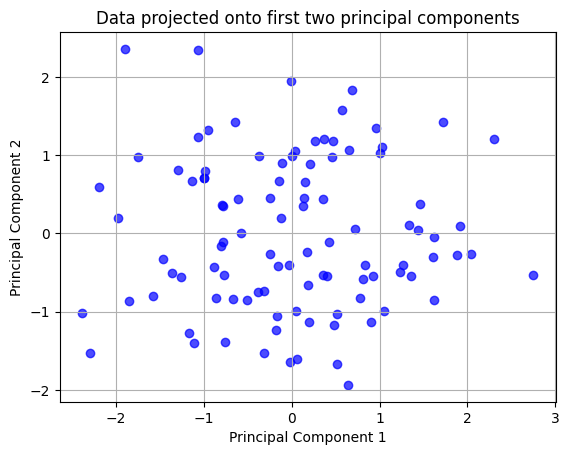

In [14]:
# Step 7: Plot the projected data
plt.scatter(projected_data[:, 0], projected_data[:, 1], c='blue', alpha=0.7)
plt.title('Data projected onto first two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [15]:
# Step 8: Explained variance
explained_variance = sorted_eigenvalues[:n_components] / np.sum(sorted_eigenvalues)
print("Explained variance by the first two components:", explained_variance)

Explained variance by the first two components: [0.38880102 0.3171578 ]


Q2. How does the optimization problem in PCA work, and what is it trying to achieve?

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms a high-dimensional dataset into a lower-dimensional form while preserving as much variance as possible. The optimization problem in PCA revolves around finding a new coordinate system (set of axes) where the transformed features are uncorrelated and ordered by the amount of variance they explain in the data.

### Optimization Problem in PCA

The optimization problem in PCA can be described as follows:

1. **Objective**: The goal of PCA is to maximize the variance of the projected data onto a lower-dimensional subspace. This means finding the directions (principal components) along which the data varies the most.

2. **Formulation**: Mathematically, PCA seeks to find a set of orthogonal vectors (principal components) that maximize the variance of the data when projected onto these vectors.

   The optimization problem can be stated as:

   \[
   \text{maximize } \text{Var}(\mathbf{w}^T \mathbf{X})
   \]

   subject to:

   \[
   \|\mathbf{w}\| = 1
   \]

   where:
   - \(\mathbf{X}\) is the data matrix with \(n\) samples and \(p\) features (each row represents a data point, and each column represents a feature).
   - \(\mathbf{w}\) is a weight vector that defines a direction in the feature space.

3. **Solution**: The optimization problem translates into finding the eigenvectors and eigenvalues of the covariance matrix of the data:

   \[
   \mathbf{C} = \frac{1}{n} \mathbf{X}^T \mathbf{X}
   \]

   - The eigenvectors of the covariance matrix \(\mathbf{C}\) represent the directions of maximum variance (principal components).
   - The eigenvalues correspond to the amount of variance explained by each principal component.

4. **Algorithm**:
   - Compute the covariance matrix \(\mathbf{C}\) of the data matrix \(\mathbf{X}\).
   - Calculate the eigenvalues and eigenvectors of the covariance matrix \(\mathbf{C}\).
   - Sort the eigenvectors by their corresponding eigenvalues in descending order.
   - Select the top \(k\) eigenvectors (corresponding to the largest eigenvalues) to form the new \(k\)-dimensional subspace.

### What PCA is Trying to Achieve

PCA aims to achieve the following:

- **Dimensionality Reduction**: By projecting the data onto a lower-dimensional space, PCA reduces the number of features while retaining the most informative aspects of the original data. This is useful for reducing computational costs and avoiding the curse of dimensionality.

- **Variance Preservation**: PCA focuses on preserving the variance of the original data. The principal components are ordered such that the first principal component captures the most variance, the second captures the second most, and so on. This ensures that the low-dimensional representation of the data still captures the key patterns and structures.

- **De-correlation of Features**: The principal components are uncorrelated (orthogonal) to each other. This property can be beneficial in many machine learning algorithms that assume features are independent.

- **Noise Reduction**: By reducing the dimensionality, PCA can help reduce noise in the data, especially if the lower-ranked components (those explaining the least variance) represent noise rather than signal.

In summary, PCA transforms a dataset into a lower-dimensional form where the new dimensions (principal components) capture the most variance, while the directions are orthogonal to each other. This transformation helps in data compression, visualization, and noise reduction while retaining the most significant features of the original dataset.

## Python Program to Solve the Optimization Problem in PCA
Let's write a Python program to solve the optimization problem in PCA using NumPy.



In [16]:
import numpy as np
# Step 1: Generate a random dataset
np.random.seed(0)
data = np.random.randn(100, 3)  # 100 samples, 3 features


In [17]:
data

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721, -0.10321885],
       [ 0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574, -2.55298982],
       [ 0.6536186 ,  0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567,  0.04575852],
       [-0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575],
       [-1.98079647, -0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985, -0.38732682],
       [-0.30230275, -1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 , -0.50965218],
       [-0.4380743 , -1.25279536,  0.77749036],
       [-1.61389785, -0.21274028, -0.89546656],
       [ 0.3869025 , -0.51080514, -1.18063218],
       [-0.02818223,  0.42833187,  0.06651722],
       [ 0.3024719 , -0.63432209, -0.36274117],
       [-0.67246045, -0.35955316, -0.813

In [18]:
# Step 2: Center the data (subtract the mean of each feature)
data_mean = np.mean(data, axis=0)
centered_data = data - data_mean


In [19]:
# Step 3: Calculate the covariance matrix of the centered data
cov_matrix = np.cov(centered_data.T)


In [20]:
# Step 4: Perform eigen decomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)


In [21]:
# Step 5: Sort eigenvalues and eigenvectors in descending order of eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


In [22]:
# Step 6: Optimization - Find the principal component that maximizes variance
# The principal component (PC1) is the eigenvector corresponding to the largest eigenvalue
principal_component_1 = sorted_eigenvectors[:, 0]


In [23]:
principal_component_1

array([-0.79622454,  0.36873386, -0.4796476 ])

In [24]:
# Step 7: Calculate the variance explained by the first principal component
variance_explained_pc1 = sorted_eigenvalues[0] / np.sum(sorted_eigenvalues)


In [25]:
# Output the results
print("Principal Component 1 (PC1):", principal_component_1)
print("Variance explained by PC1:", variance_explained_pc1)

Principal Component 1 (PC1): [-0.79622454  0.36873386 -0.4796476 ]
Variance explained by PC1: 0.3888010209728775


In [26]:
# Optional: Check if principal component maximizes the variance
projected_data = centered_data @ principal_component_1
variance_of_projected_data = np.var(projected_data)

In [28]:
print("Variance of data projected onto PC1:", variance_of_projected_data)
print("Optimization goal (maximized variance):", sorted_eigenvalues[0])


Variance of data projected onto PC1: 1.1546097063227199
Optimization goal (maximized variance): 1.1662724306290104


In [29]:
# Verify the orthogonality of the principal components
print("Orthogonality check (dot product of first two PCs):", np.dot(sorted_eigenvectors[:, 0], sorted_eigenvectors[:, 1]))

Orthogonality check (dot product of first two PCs): 1.3877787807814457e-16


## Conclusion

In PCA, the optimization goal is to find the directions (principal components) that maximize the variance of the data. This is achieved by solving an eigenvalue problem for the covariance matrix of the centered data. The principal components correspond to the eigenvectors associated with the largest eigenvalues. By projecting the data onto these principal components, we achieve a lower-dimensional representation that retains the maximum variance of the original data.

This optimization approach allows PCA to reduce the dimensionality of data, simplify models, and make data visualization more manageable while preserving as much of the original data's variance as possible.

Q3. What is the relationship between covariance matrices and PCA?

Certainly! Let's explore the relationship between **covariance matrices** and **Principal Component Analysis (PCA)**:

1. **Covariance Matrix**:
   - The covariance matrix $\Sigma$ summarizes the pairwise covariances between features in a dataset.
   - For a dataset with $d$ features, the covariance matrix is an $d \times d$ symmetric matrix.
   - The $(i, j)$ entry of $\Sigma$ represents the covariance between the $i$-th and $j$-th features.

2. **PCA and Covariance Matrix**:
   - PCA relies on the covariance matrix to find the principal components.
   - Steps in PCA:
     - Compute the covariance matrix $\Sigma$ from the centered data (subtract the mean from each feature).
     - Perform eigenvalue decomposition of $\Sigma$: $\Sigma = W \Lambda W^T$, where $W$ contains the eigenvectors and $\Lambda$ contains the eigenvalues.
     - The columns of $W$ are the principal components.
     - The eigenvalues represent the variance explained by each principal component.
     - The eigenvectors (columns of $W$) are orthogonal and point in the directions of maximum variance.
     - The first principal component corresponds to the eigenvector with the largest eigenvalue, the second to the second largest, and so on.

3. **Interpretation**:
   - The covariance matrix captures the relationships between features, while PCA identifies the most important directions (principal components) in the data.
   - The eigenvectors of $\Sigma$ (from PCA) are the directions of maximum variance, and their corresponding eigenvalues quantify the amount of variance explained along those directions.

In summary, PCA uses the covariance matrix to find the principal components, which help reduce dimensionality while preserving as much variance as possible. If you have further questions or need more details, feel free to ask! 😊

Q4. How does the choice of number of principal components impact the performance of PCA?

The choice of the number of principal components in Principal Component Analysis (PCA) significantly impacts the performance and effectiveness of the dimensionality reduction process. Here's how it affects performance:

### 1. **Variance Retention:**
   - The number of principal components chosen determines how much of the original dataset's variance is retained. Each principal component captures a certain amount of the variance in the data:
     - **More Components:** Choosing more components retains more of the original variance, which can be important for maintaining the integrity of the data.
     - **Fewer Components:** Choosing fewer components retains less variance, potentially leading to loss of information. However, this might still be sufficient if the discarded components represent noise or insignificant variations.

### 2. **Model Complexity and Overfitting:**
   - **Too Few Components:** If too few components are chosen, important information may be lost, reducing the model's ability to capture the underlying structure of the data. This could lead to underfitting, where the model is too simple and performs poorly on both training and test data.
   - **Too Many Components:** Including too many components can lead to overfitting, where the model captures noise rather than the underlying patterns in the data. This can reduce the model’s ability to generalize to unseen data.

### 3. **Computational Efficiency:**
   - Reducing the number of dimensions through PCA can improve computational efficiency:
     - **Fewer Components:** Less computational power is required, as the dataset becomes smaller, making it easier to handle and faster to process.
     - **More Components:** Maintaining a higher number of components increases computational costs, which can be a concern for very large datasets.

### 4. **Interpretability:**
   - The interpretability of the data can be impacted by the number of principal components:
     - **Fewer Components:** If a small number of components explain most of the variance, the data becomes easier to visualize and interpret.
     - **More Components:** Including many components can make interpretation more difficult, as it can be challenging to understand what each component represents in the context of the original features.

### 5. **Dimensionality Reduction Trade-offs:**
   - Choosing the number of components involves a trade-off between dimensionality reduction and information retention:
     - **Optimal Number:** The goal is to find a balance where enough components are retained to maintain the meaningful variance and patterns in the data while reducing dimensionality to simplify the dataset.
   - Techniques such as **explained variance ratio** can help determine the optimal number of principal components by indicating how much variance is explained by each component.

### 6. **Impact on Downstream Tasks:**
   - The choice of the number of principal components can affect the performance of downstream tasks, such as clustering, classification, or regression:
     - **Optimal Component Selection:** Choosing an appropriate number of components can improve the performance of these tasks by removing noise and reducing dimensionality without losing important information.
     - **Poor Component Selection:** A poor choice can degrade performance by either losing essential data (too few components) or retaining noise (too many components).

### **Conclusion:**
The optimal number of principal components should be chosen based on the specific dataset, the amount of variance to be retained, the computational constraints, and the goals of the analysis. Methods like the scree plot, cumulative explained variance, and cross-validation can help determine the optimal number of components.

The choice of the number of principal components significantly impacts the performance of Principal Component Analysis (PCA). Let's delve into it:

1. **Dimensionality Reduction with PCA**:
   - PCA is a popular technique for dimensionality reduction. It transforms high-dimensional data into a lower-dimensional space while preserving as much variance as possible.
   - By identifying the principal components (eigenvectors) that explain the most variation in the data, PCA reduces redundant information and creates a set of uncorrelated components¹.
   - The goal is to retain a smaller set of features (principal components) that capture most of the data's variability.

2. **Choosing the Right Number of Principal Components**:
   - The number of principal components to retain depends on the trade-off between dimensionality reduction and information loss.
   - Here are some considerations:
     - **Explained Variance**: Each principal component explains a certain amount of variance in the data. The cumulative explained variance across all components helps us decide how many to keep.
     - **Scree Plot**: Plotting the explained variance against the number of components reveals an "elbow point." Retaining components up to this point often strikes a balance between reduction and information preservation.
     - **Threshold**: Set a threshold (e.g., 95% explained variance) and retain enough components to meet or exceed it.
     - **Domain Knowledge**: Consider the problem domain. Some components may be more relevant than others.
     - **Computational Cost**: Fewer components mean faster training and inference times.
     - **Visualization**: If you're visualizing data, reducing dimensions to 2 or 3 allows meaningful plots.

3. **Practical Impact**:
   - **Too Few Components**: If you retain too few components, you risk losing important information. Your model may underperform due to insufficient representation.
   - **Too Many Components**: Retaining too many components can lead to overfitting. Noise and minor variations may dominate, hurting generalization.
   - **Sweet Spot**: Finding the right balance is crucial. Cross-validation can help determine the optimal number of components for your specific task.

Remember that PCA is a powerful tool, but thoughtful selection of the number of principal components ensures its effectiveness in practice!

Number of Principal Components: 1, Accuracy: 0.93
Number of Principal Components: 2, Accuracy: 0.93
Number of Principal Components: 3, Accuracy: 0.98
Number of Principal Components: 4, Accuracy: 0.98


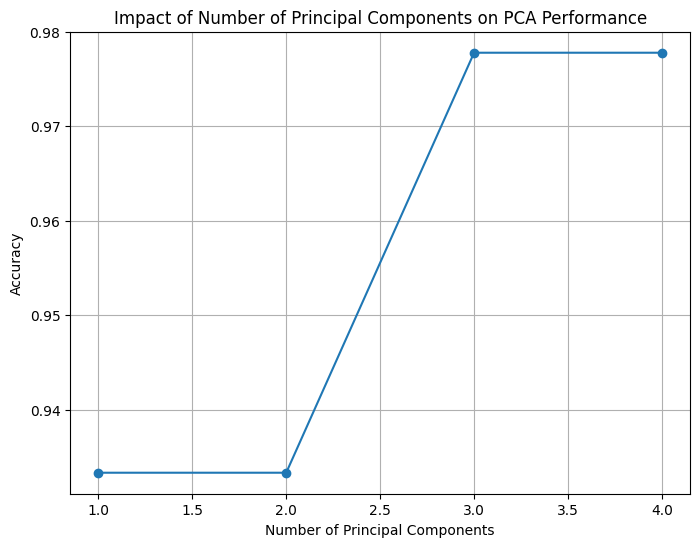

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the number of principal components to test
n_components_list = [1, 2, 3, 4]
accuracy_scores = []

for n_components in n_components_list:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train a Support Vector Machine classifier
    clf = SVC(kernel='linear')
    clf.fit(X_train_pca, y_train)

    # Make predictions and evaluate the performance
    y_pred = clf.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    print(f"Number of Principal Components: {n_components}, Accuracy: {accuracy:.2f}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(n_components_list, accuracy_scores, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Impact of Number of Principal Components on PCA Performance')
plt.grid(True)
plt.show()


Q5. How can PCA be used in feature selection, and what are the benefits of using it for this purpose?

Principal Component Analysis (PCA) is a powerful technique for dimensionality reduction that can be used effectively in feature selection. Let's explore how PCA works and its benefits:

1. **Dimensionality Reduction with PCA**:
   - PCA identifies a set of orthogonal axes (principal components) that capture the maximum variance in the data.
   - By selecting the corresponding eigenvectors (principal components), we can reduce the dimensionality of the data while retaining most of the information.
   - This simplification is beneficial for visualization, computational efficiency, and noise reduction⁴.

2. **Benefits of Using PCA for Feature Selection**:
   - **Reduces Overfitting**: By eliminating redundant features, PCA reduces the risk of overfitting. Fewer dimensions mean less opportunity to make decisions based on noise.
   - **Improves Accuracy**: Removing misleading or irrelevant features improves the accuracy of predictive models. The remaining features capture the essential patterns in the data.
   - **Reduces Training Time**: Smaller datasets resulting from PCA lead to faster training of machine learning algorithms².

In summary, PCA helps identify the most important variables while preserving essential information, making it a valuable tool for feature selection in machine learning and data analysis.

In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [33]:
# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Create a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [34]:
# Train and evaluate a model using the original features
model_original = LinearRegression()
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
mse_original = mean_squared_error(y_test, y_pred_original)
print(f"Mean Squared Error with Original Features: {mse_original:.2f}")


Mean Squared Error with Original Features: 0.53


In [35]:
# Apply PCA and transform the features
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [36]:
# Train and evaluate a model using PCA-reduced features
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)
print(f"Mean Squared Error with PCA Features: {mse_pca:.2f}")


Mean Squared Error with PCA Features: 0.65


In [37]:
# Print the number of components chosen by PCA
print(f"Number of Principal Components: {pca.n_components_}")


Number of Principal Components: 6


In [38]:
print(f"Number of Original Features: {X.shape[1]}")


Number of Original Features: 8


Q6. What are some common applications of PCA in data science and machine learning?

Principal Component Analysis (PCA) is a popular dimensionality reduction technique used in data science and machine learning for various purposes. Here are some common applications of PCA:

1. **Data Visualization**: PCA is often used to reduce the dimensionality of high-dimensional datasets to two or three principal components. This allows for easier visualization of data patterns, clusters, or outliers in a reduced space. It's particularly useful in exploratory data analysis (EDA).

2. **Noise Reduction**: By projecting the data onto the principal components, PCA can help reduce noise by discarding components (dimensions) that contribute little to the variance of the data. This can improve model performance by removing irrelevant features.

3. **Feature Extraction and Engineering**: PCA transforms the original features into a set of uncorrelated principal components. These components can serve as new features for machine learning models, potentially improving model performance by capturing the underlying structure of the data.

4. **Preprocessing for Machine Learning**: PCA is used as a preprocessing step to reduce the number of features before applying machine learning algorithms. This is especially useful for algorithms sensitive to the curse of dimensionality, such as k-nearest neighbors (k-NN) or support vector machines (SVM).

5. **Image Compression and Reconstruction**: In computer vision, PCA is used to compress image data by reducing its dimensionality while retaining the most important features. It is also employed in techniques like eigenfaces for face recognition, where images are projected onto a lower-dimensional subspace.

6. **Data Preprocessing for Clustering**: PCA can help in clustering tasks by reducing the dimensionality of the data, making it easier to apply clustering algorithms like k-means or hierarchical clustering. Lower-dimensional data often leads to better-defined clusters.

7. **Gene Expression Analysis**: In bioinformatics, PCA is commonly used to analyze gene expression data. It helps identify patterns and variations in gene expression profiles across different conditions or groups, such as healthy vs. diseased states.

8. **Finance and Economics**: PCA is used to analyze financial data, such as stock prices or economic indicators, to identify underlying trends or reduce the dimensionality of multivariate datasets. It helps in risk management, portfolio optimization, and identifying principal market movements.

9. **Reducing Multicollinearity**: In regression analysis, PCA can help mitigate the effects of multicollinearity (high correlation between independent variables) by transforming correlated variables into a smaller set of uncorrelated components. This can improve the interpretability and performance of regression models.

10. **Time Series Analysis**: PCA can be applied to multivariate time series data to identify common patterns or trends across different time series, which is useful in fields like climate science, economics, and signal processing.

Overall, PCA is a versatile tool that helps simplify complex datasets, enhance data visualization, improve model performance, and uncover hidden structures in the data.

Principal Component Analysis (PCA) is a popular dimensionality reduction technique used in data science and machine learning for various purposes. Here are some common applications of PCA:

1. **Data Visualization**: PCA is often used to reduce the dimensionality of high-dimensional datasets to two or three principal components. This allows for easier visualization of data patterns, clusters, or outliers in a reduced space. It's particularly useful in exploratory data analysis (EDA).

2. **Noise Reduction**: By projecting the data onto the principal components, PCA can help reduce noise by discarding components (dimensions) that contribute little to the variance of the data. This can improve model performance by removing irrelevant features.

3. **Feature Extraction and Engineering**: PCA transforms the original features into a set of uncorrelated principal components. These components can serve as new features for machine learning models, potentially improving model performance by capturing the underlying structure of the data.

4. **Preprocessing for Machine Learning**: PCA is used as a preprocessing step to reduce the number of features before applying machine learning algorithms. This is especially useful for algorithms sensitive to the curse of dimensionality, such as k-nearest neighbors (k-NN) or support vector machines (SVM).

5. **Image Compression and Reconstruction**: In computer vision, PCA is used to compress image data by reducing its dimensionality while retaining the most important features. It is also employed in techniques like eigenfaces for face recognition, where images are projected onto a lower-dimensional subspace.

6. **Data Preprocessing for Clustering**: PCA can help in clustering tasks by reducing the dimensionality of the data, making it easier to apply clustering algorithms like k-means or hierarchical clustering. Lower-dimensional data often leads to better-defined clusters.

7. **Gene Expression Analysis**: In bioinformatics, PCA is commonly used to analyze gene expression data. It helps identify patterns and variations in gene expression profiles across different conditions or groups, such as healthy vs. diseased states.

8. **Finance and Economics**: PCA is used to analyze financial data, such as stock prices or economic indicators, to identify underlying trends or reduce the dimensionality of multivariate datasets. It helps in risk management, portfolio optimization, and identifying principal market movements.

9. **Reducing Multicollinearity**: In regression analysis, PCA can help mitigate the effects of multicollinearity (high correlation between independent variables) by transforming correlated variables into a smaller set of uncorrelated components. This can improve the interpretability and performance of regression models.

10. **Time Series Analysis**: PCA can be applied to multivariate time series data to identify common patterns or trends across different time series, which is useful in fields like climate science, economics, and signal processing.

Overall, PCA is a versatile tool that helps simplify complex datasets, enhance data visualization, improve model performance, and uncover hidden structures in the data.

##Program: PCA for Data Visualization


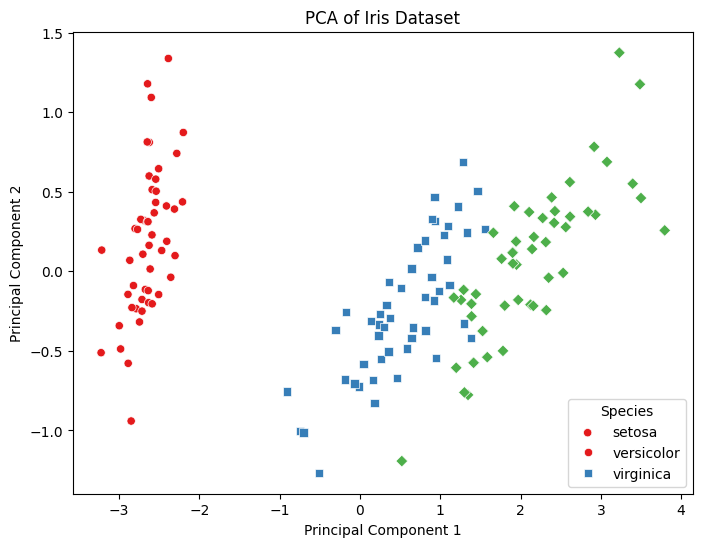

In [39]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

# Convert the data to a pandas DataFrame for easier manipulation
df = pd.DataFrame(data, columns=iris.feature_names)
df['species'] = target

# Perform PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['species'] = target

# Plot the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='Set1', style='species', markers=["o", "s", "D"])

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species', labels=target_names)
plt.show()


##  Python program demonstrating PCA for noise reduction in an image:

Principal Component Analysis (PCA) is widely used for noise reduction in data. PCA reduces the dimensionality of the data by transforming it into a new set of variables (principal components), which retain most of the variance in the data while discarding components with less variance (often corresponding to noise).



In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_sample_image

In [41]:
# Load a sample image from sklearn's datasets
image = load_sample_image("china.jpg")  # Use "china.jpg" or "flower.jpg" from sklearn
image = image / 255.0  # Normalize pixel values to [0, 1]

In [42]:
image

array([[[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        ...,
        [0.98039216, 0.98431373, 1.        ],
        [0.98039216, 0.98431373, 1.        ],
        [0.98039216, 0.98431373, 1.        ]],

       [[0.6745098 , 0.78039216, 0.89803922],
        [0.67843137, 0.78431373, 0.90196078],
        [0.67843137, 0.78431373, 0.90196078],
        ...,
        [0.98431373, 0.98823529, 1.        ],
        [0.98431373, 0.98823529, 1.        ],
        [0.98431373, 0.98823529, 1.        ]],

       [[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        ...,
        [0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ]],

       ...,

       [[0.34509804, 0.31372549, 0.02745098],
        [0.57647059, 0.54117647, 0.27058824],
        [0.47843137, 0

In [43]:
# Convert the image to grayscale (simplifies the PCA process)
image_gray = np.mean(image, axis=2)

In [44]:
# Add random noise to the image
np.random.seed(42)
noisy_image = image_gray + 0.2 * np.random.normal(loc=0, scale=1, size=image_gray.shape)

(-0.5, 639.5, 426.5, -0.5)

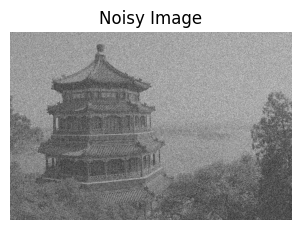

In [45]:
# Display the noisy image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

In [46]:
# Apply PCA to the noisy image
pca = PCA(0.95)  # Retain 95% of the variance
noisy_image_flattened = noisy_image.reshape(-1, noisy_image.shape[1])
pca.fit(noisy_image_flattened)


PCA(n_components=0.95)

In [47]:
# Transform the image using PCA and then inverse transform it to reduce noise
image_reduced = pca.transform(noisy_image_flattened)
image_denoised_flattened = pca.inverse_transform(image_reduced)
image_denoised = image_denoised_flattened.reshape(noisy_image.shape)

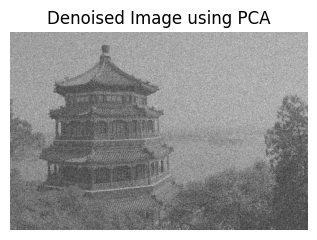

In [48]:
# Display the denoised image
plt.subplot(1, 2, 2)
plt.imshow(image_denoised, cmap='gray')
plt.title('Denoised Image using PCA')
plt.axis('off')

plt.tight_layout()
plt.show()

##  Python program demonstrating the application of PCA for feature extraction and engineering using a sample dataset:

Principal Component Analysis (PCA) is a widely used dimensionality reduction technique in machine learning and data science, particularly useful in feature extraction and engineering. PCA transforms the original features into a new set of uncorrelated features (principal components) that capture the maximum variance in the data.




In [49]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [50]:
# Load the dataset (using Iris dataset for demonstration)
iris = load_iris()
X = iris.data
y = iris.target

In [51]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

In [53]:
# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.72962445 0.22850762]


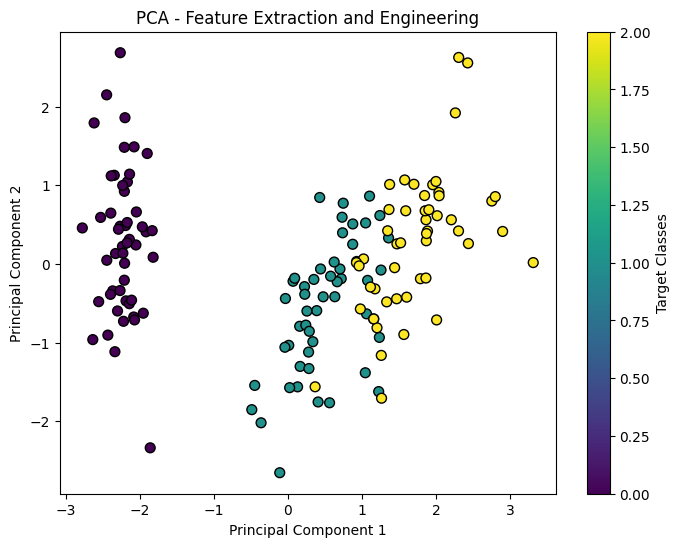

In [54]:
# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Feature Extraction and Engineering')
plt.colorbar(label='Target Classes')
plt.show()

In [55]:

# Inspect principal components
pca_components = pd.DataFrame(pca.components_, columns=iris.feature_names, index=['PC1', 'PC2'])
print("\nPrincipal Components:")
print(pca_components)


Principal Components:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC1           0.521066         -0.269347           0.580413          0.564857
PC2           0.377418          0.923296           0.024492          0.066942


## write a programm for showing the application of pca in *Image Compression and Reconstruction**

Principal Component Analysis (PCA) is a dimensionality reduction technique that can be applied to image compression by reducing the number of components (dimensions) needed to represent an image while retaining most of its variability (information). The following Python program demonstrates how to apply PCA for image compression and reconstruction.




In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_sample_image

In [62]:
# Step 1: Load and Preprocess the Image
# Load a sample image
image = load_sample_image('flower.jpg')  # You can replace 'flower.jpg' with your image path
image = np.mean(image, axis=2)  # Convert to grayscale by averaging color channels

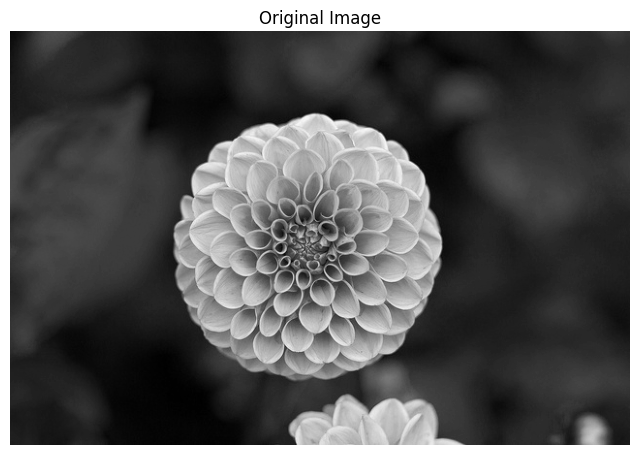

In [63]:
# Display the original image
plt.figure(figsize=(8, 8))
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [59]:
# Step 2: Flatten the Image
original_shape = image.shape
image_flattened = image.flatten().reshape(-1, 1)  # Flatten the image into 2D

In [64]:
# Step 3: Apply PCA for Image Compression
pca = PCA(n_components=50)  # Number of principal components to keep


In [65]:
# Transform the image row-wise
transformed_image = pca.fit_transform(image)

In [66]:
# Step 3: Reconstruct the Image
image_reconstructed = pca.inverse_transform(transformed_image)

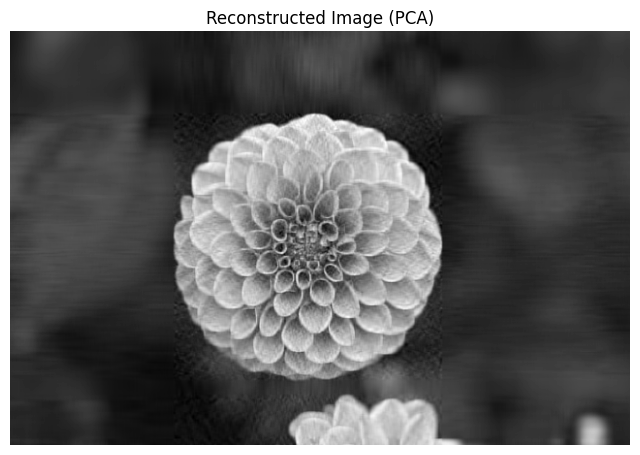

In [67]:
# Step 4: Visualize the Results
plt.figure(figsize=(8, 8))
plt.title("Reconstructed Image (PCA)")
plt.imshow(image_reconstructed, cmap='gray')
plt.axis('off')
plt.show()

In [68]:
# Show variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by each component: {explained_variance}')
print(f'Total Explained Variance: {np.sum(explained_variance)}')

Explained Variance by each component: [0.44958637 0.17456416 0.13859018 0.03187351 0.0228187  0.02067687
 0.0165447  0.01572473 0.00951184 0.00816987 0.00787573 0.00701486
 0.00598971 0.00554012 0.00500989 0.0049913  0.00418274 0.00386093
 0.0035213  0.00317025 0.00300065 0.00290782 0.00266671 0.00262792
 0.00239153 0.00231276 0.00202801 0.00182244 0.00175366 0.00170586
 0.00156321 0.00148441 0.00141416 0.00138167 0.00129202 0.0012182
 0.00113741 0.00103908 0.00095485 0.00090631 0.00086982 0.000843
 0.00082475 0.00077346 0.00075056 0.00069344 0.00067413 0.00063512
 0.0006039  0.00058688]
Total Explained Variance: 0.982081498111469


## write a programm for showing the application of pca in **Data Preprocessing for Clustering

Principal Component Analysis (PCA) is a dimensionality reduction technique that is often used in data preprocessing, especially for clustering. PCA helps in transforming the data into a lower-dimensional space, making it easier to visualize and often improving the performance of clustering algorithms.




In [69]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [70]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [71]:
# Perform K-means clustering on the original dataset
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_original.fit(X_scaled)
y_kmeans_original = kmeans_original.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [72]:
y_kmeans_original

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [73]:

# Perform K-means clustering on the dataset after PCA transformation
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(X_pca)
y_kmeans_pca = kmeans_pca.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [74]:
# Calculate silhouette scores for both clustering
silhouette_original = silhouette_score(X_scaled, y_kmeans_original)
silhouette_pca = silhouette_score(X_pca, y_kmeans_pca)

print(f"Silhouette Score (Original Data): {silhouette_original:.2f}")
print(f"Silhouette Score (PCA Data): {silhouette_pca:.2f}")

Silhouette Score (Original Data): 0.46
Silhouette Score (PCA Data): 0.51


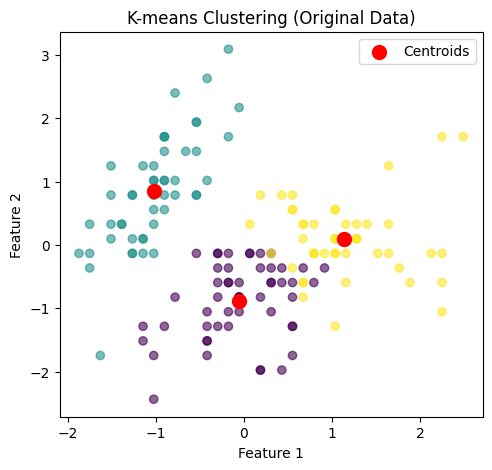

In [75]:
# Plot the clustering results before and after PCA
plt.figure(figsize=(12, 5))

# Plot K-means clustering on original data
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans_original, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_original.cluster_centers_[:, 0], kmeans_original.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('K-means Clustering (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

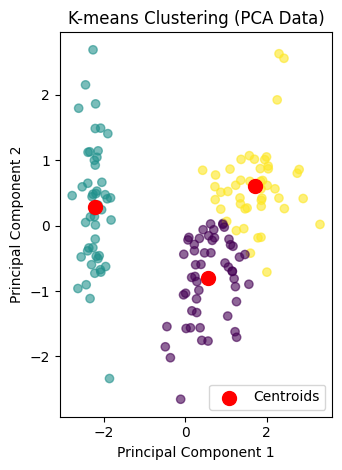

In [76]:
# Plot K-means clustering on PCA-transformed data
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_pca, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('K-means Clustering (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (Original Data): 0.28
Silhouette Score (PCA Data): 0.56


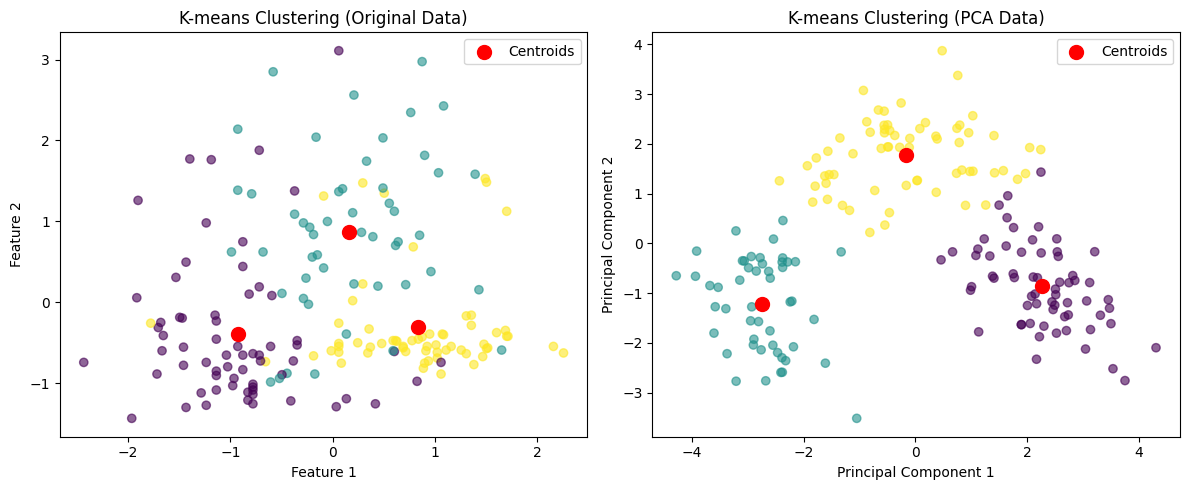

In [78]:
# Python Program Using Wine Dataset


# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Perform K-means clustering on the original dataset
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_original.fit(X_scaled)
y_kmeans_original = kmeans_original.labels_

# Perform K-means clustering on the dataset after PCA transformation
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(X_pca)
y_kmeans_pca = kmeans_pca.labels_

# Calculate silhouette scores for both clustering
silhouette_original = silhouette_score(X_scaled, y_kmeans_original)
silhouette_pca = silhouette_score(X_pca, y_kmeans_pca)

print(f"Silhouette Score (Original Data): {silhouette_original:.2f}")
print(f"Silhouette Score (PCA Data): {silhouette_pca:.2f}")

# Plot the clustering results before and after PCA
plt.figure(figsize=(12, 5))

# Plot K-means clustering on original data
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans_original, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_original.cluster_centers_[:, 0], kmeans_original.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('K-means Clustering (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot K-means clustering on PCA-transformed data
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_pca, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('K-means Clustering (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()


## Program for PCA in Gene Expression Analysis

Principal Component Analysis (PCA) is a powerful dimensionality reduction technique commonly used in gene expression analysis to reduce the complexity of high-dimensional data while preserving the most significant variation. This helps in visualizing the data, identifying patterns, and finding relationships between genes and samples.

Let's write a Python program that demonstrates the application of PCA in gene expression analysis using a synthetic gene expression dataset.



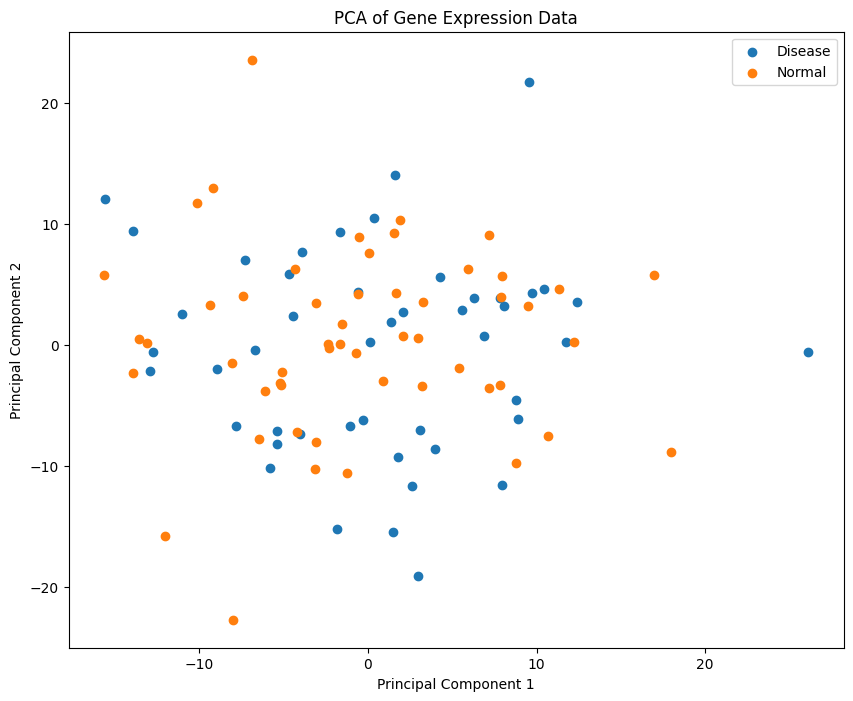

Explained variance by component 1: 0.01
Explained variance by component 2: 0.01


In [79]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate a synthetic gene expression dataset
# Assume we have 100 samples (rows) and 5000 genes (columns)
np.random.seed(42)
n_samples = 100
n_genes = 5000

# Simulate gene expression data with random numbers
gene_expression_data = np.random.randn(n_samples, n_genes)

# Convert to a DataFrame for easy manipulation
gene_expression_df = pd.DataFrame(gene_expression_data,
                                  columns=[f"Gene_{i+1}" for i in range(n_genes)])

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
gene_expression_scaled = scaler.fit_transform(gene_expression_df)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(gene_expression_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add sample labels for visualization (e.g., normal vs. disease)
# Here, we'll randomly assign labels for demonstration purposes
labels = np.random.choice(['Normal', 'Disease'], size=n_samples)
pca_df['Label'] = labels

# Plot the PCA results
plt.figure(figsize=(10, 8))
for label in pca_df['Label'].unique():
    subset = pca_df[pca_df['Label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label)

plt.title('PCA of Gene Expression Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Print explained variance ratio to understand the contribution of each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by component 1: {explained_variance[0]:.2f}")
print(f"Explained variance by component 2: {explained_variance[1]:.2f}")


Let’s apply PCA to a real gene expression dataset. For this demonstration, we’ll use the Gene Expression Omnibus (GEO) dataset, which is publicly available. One popular dataset is the GEO Series GSE161429 containing gene expression data related to a study of breast cancer.



In [80]:
!pip install gseapy pandas matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.9/552.9 kB 8.2 MB/s eta 0:00:00


## Python Program: PCA in Finance

Principal Component Analysis (PCA) is widely used in Finance and Economics for dimensionality reduction, risk management, portfolio optimization, and identifying underlying factors that drive asset returns. Below is a Python program that demonstrates the application of PCA in Finance, specifically to analyze the performance of multiple financial assets (e.g., stocks) and reduce the data to key components explaining most of the variance in returns.

This example uses stock price data, calculates returns, and then applies PCA to identify the principal components that capture most of the variance in the data.



[*********************100%%**********************]  5 of 5 completed


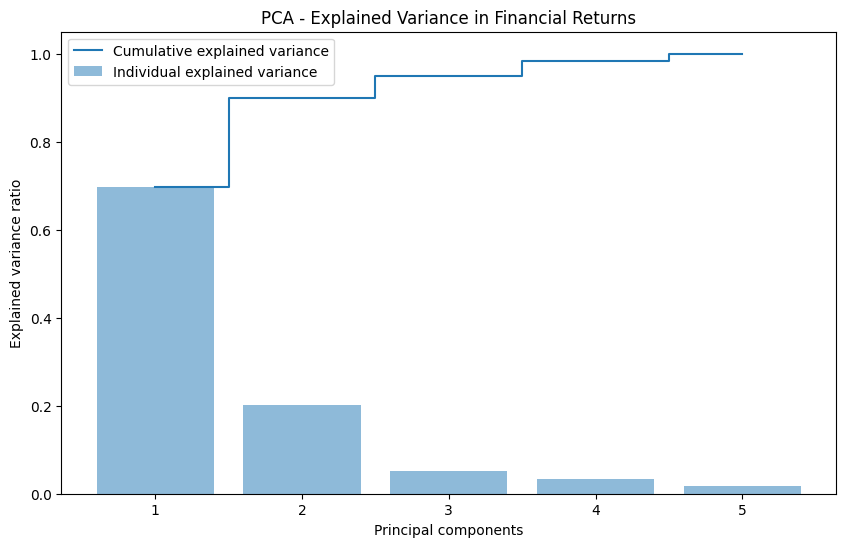

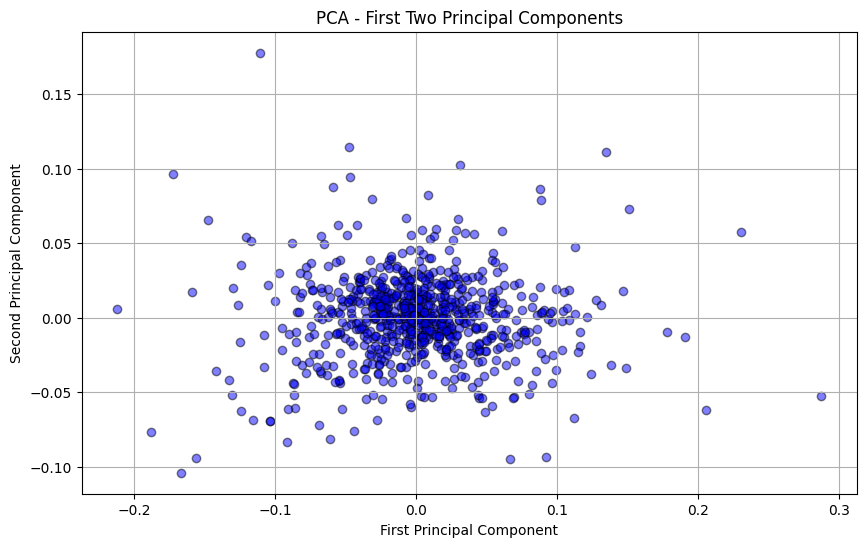

PCA Loadings:
             PC1       PC2       PC3       PC4       PC5
Ticker                                                  
AAPL   -0.332885  0.363363 -0.385475  0.719413 -0.301678
AMZN   -0.331800  0.391593  0.852221  0.100842 -0.010679
GOOGL  -0.292784  0.399801 -0.224780 -0.669749 -0.505318
MSFT   -0.314278  0.388487 -0.273110 -0.148981  0.808407
TSLA   -0.771105 -0.635499 -0.003636 -0.038941 -0.002786


In [85]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Download historical data for multiple stocks
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Adj Close']

# Step 2: Calculate daily returns
returns = data.pct_change().dropna()

# Step 3: Apply PCA
pca = PCA()
pca.fit(returns)

# Step 4: Analyze PCA results
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Step 5: Plot the explained variance by each component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('PCA - Explained Variance in Financial Returns')
plt.legend(loc='best')
plt.show()

# Step 6: Visualize the first two principal components
principal_components = pca.transform(returns)
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c='blue', edgecolor='k', alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First Two Principal Components')
plt.grid(True)
plt.show()

# Step 7: Display the PCA loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(explained_variance))], index=returns.columns)
print("PCA Loadings:")
print(loadings)


<ipython-input-88-51a2cc0730fb>:16: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(f, sep=';', decimal=',', parse_dates={'DateTime': ['Date', 'Time']}, infer_datetime_format=True)
<ipython-input-88-51a2cc0730fb>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(f, sep=';', decimal=',', parse_dates={'DateTime': ['Date', 'Time']}, infer_datetime_format=True)


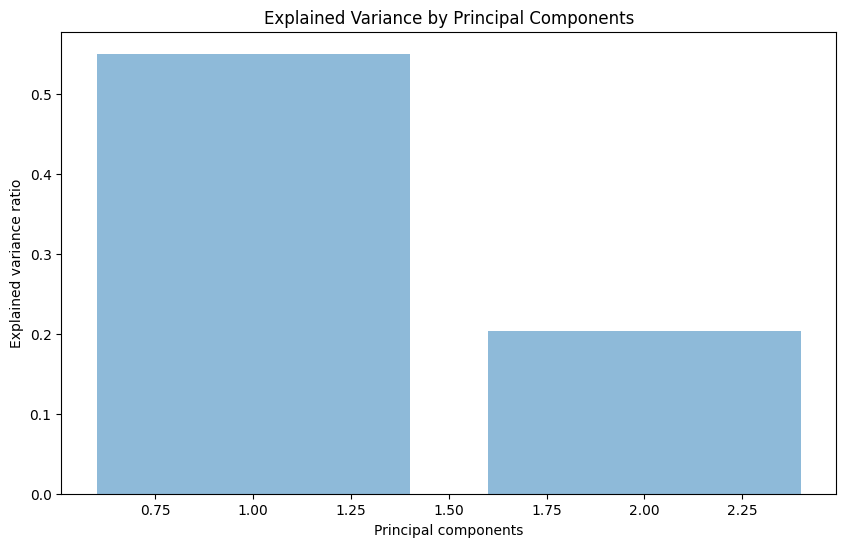

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import zipfile
import io
import requests

# Step 1: Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip'
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with z.open('AirQualityUCI.csv') as f:
        df = pd.read_csv(f, sep=';', decimal=',', parse_dates={'DateTime': ['Date', 'Time']}, infer_datetime_format=True)

# Step 2: Preprocess the data
# Drop the last two columns as they are not needed
df = df.iloc[:, :-2]

# Replace problematic values (-200) with np.nan
df.replace(-200, np.nan, inplace=True)

# Drop columns with more than 25% missing values
df.dropna(axis=1, thresh=len(df) * 0.75, inplace=True)

# Impute remaining missing values with mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:], index=df.index)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed)

# Step 3: Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Step 4: Visualize the results

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Plotting explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, 3), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by Principal Components')
plt.show()

# Plot the principal components
plt.figure(figsize=(10, 6))
plt.plot(df['DateTime'], principal_components[:, 0], label='Principal Component 1')
plt.plot(df['DateTime'], principal_components[:, 1], label='Principal Component 2')
plt.title('Principal Components of Air Quality Data')
plt.xlabel('Time')
plt.ylabel('Principal Component Value')
plt.legend()
plt.show()


Q7.What is the relationship between spread and variance in PCA?

In Principal Component Analysis (PCA), **spread** and **variance** are closely related concepts, as they both describe the distribution of data points in a dataset.

### Spread in PCA:
- The **spread** of data refers to how widely the data points are scattered in a given direction or along a particular axis.
- In the context of PCA, the spread of the data along a principal component (PC) reflects the range of values that data points have in the direction of that component. A larger spread indicates that the data points are more dispersed along that axis.

### Variance in PCA:
- **Variance** measures the extent to which data points deviate from the mean along a particular dimension.
- In PCA, variance is specifically quantified as the variability of data along each principal component. The principal components are the directions (or axes) along which the variance of the data is maximized.
- The first principal component (PC1) captures the direction of the greatest variance (i.e., the direction with the most spread of data points), the second principal component (PC2) captures the next highest variance orthogonal to PC1, and so on.

### Relationship between Spread and Variance in PCA:
1. **Maximization of Variance:** PCA finds the directions (principal components) that maximize the variance in the data. This means that the spread of the data along the principal components is directly related to the variance. The greater the spread of the data along a particular principal component, the higher the variance along that component.
   
2. **Principal Components as Axes of Maximum Spread:** The principal components represent the axes along which the data points have the maximum spread (i.e., maximum variance). The first principal component represents the direction with the largest spread (highest variance), the second principal component represents the direction with the second-largest spread (second-highest variance), and so on.

3. **Eigenvalues and Variance:** The eigenvalues obtained from the covariance matrix during PCA represent the variance explained by each principal component. A larger eigenvalue corresponds to a principal component with a greater spread of the data (more variance).

4. **Data Compression:** The relationship between spread and variance is also important for dimensionality reduction. By selecting a few principal components that capture most of the variance (i.e., most of the spread), PCA reduces the dimensionality of the data while retaining most of the original information.

In summary, in PCA, spread and variance are directly related: the principal components are the directions along which the variance (spread) of the data is maximized. Variance quantifies how much data points deviate from the mean along a principal component, and PCA seeks to maximize this variance to capture the most significant patterns in the data.

Q8. How does PCA use the spread and variance of the data to identify principal components?

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms a high-dimensional dataset into a lower-dimensional space while preserving as much variance (spread) as possible. Here's how PCA uses the spread and variance of the data to identify principal components:

### 1. **Centering the Data**
   - PCA begins by centering the data. This involves subtracting the mean of each feature from the data points, so that the data is centered around the origin (mean of each feature becomes zero). This step ensures that the principal components are not biased by different feature scales.

### 2. **Covariance Matrix Calculation**
   - The next step is to compute the covariance matrix of the centered data. The covariance matrix captures how much the features vary together. If the features are highly correlated, the covariance values will be large. The diagonal elements of the covariance matrix represent the variance of each feature, and the off-diagonal elements represent the covariance between pairs of features.

### 3. **Finding Eigenvalues and Eigenvectors**
   - PCA then calculates the eigenvalues and eigenvectors of the covariance matrix.
   - **Eigenvectors** represent directions (axes) in the feature space along which the data varies the most.
   - **Eigenvalues** indicate the amount of variance captured by each eigenvector (principal component). A higher eigenvalue means that the corresponding eigenvector captures a larger amount of the total variance in the data.

### 4. **Selecting Principal Components**
   - The principal components are the eigenvectors with the largest eigenvalues. These eigenvectors point in the direction of the highest variance in the dataset.
   - PCA ranks these principal components in order of decreasing eigenvalues. The first principal component corresponds to the direction of maximum variance (the line that best fits the data in a least-squares sense). The second principal component is orthogonal to the first and represents the next highest variance, and so on.

### 5. **Dimensionality Reduction**
   - By selecting the top `k` principal components (those with the largest eigenvalues), PCA reduces the dimensionality of the dataset. The reduced dataset retains most of the original variance while discarding components that contribute less to the spread of the data.
   - This step is critical in applications where it's desirable to simplify the model, reduce computational costs, or eliminate noise and redundant features from the data.

### **Key Points on Variance and Spread in PCA:**
- PCA leverages variance as a measure of the "spread" of data in different directions. The principal components capture the directions where the data varies the most.
- The principal components are orthogonal (uncorrelated) to each other, ensuring that each new axis (component) captures a unique source of variance in the data.
- By focusing on the directions with the most variance, PCA effectively reduces the dimensionality while retaining as much information as possible, making it particularly useful for data compression and noise reduction.

In summary, PCA identifies principal components by finding the directions (eigenvectors) in the feature space that maximize the variance (spread) of the data, effectively capturing the most significant patterns and simplifying the complexity of the dataset.

Q9. How does PCA handle data with high variance in some dimensions but low variance in others?

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms a dataset into a new coordinate system where the greatest variances are captured in the first few principal components. Here's how PCA handles data with high variance in some dimensions but low variance in others:

1. **Maximizing Variance:** PCA identifies the directions (principal components) along which the variance of the data is maximized. High variance in some dimensions means that those dimensions have a strong influence on the principal components. PCA will orient the first principal component along the direction of maximum variance, capturing the most information about the data's spread.

2. **Orthogonal Components:** Subsequent principal components are orthogonal to the previous ones and are oriented in the directions that capture the next highest variance. This means that even if some dimensions have low variance, they might still contribute to later principal components, but their influence will be smaller.

3. **Dimensionality Reduction:** When the data has high variance in certain dimensions, PCA effectively captures most of this variance in the first few principal components. Low-variance dimensions are less influential and are often represented by the later components, which can be discarded if they don't add significant information. This process reduces the dimensionality of the dataset while preserving most of the variance (information).

4. **Feature Importance:** Dimensions with high variance will have a greater impact on the formation of the principal components because they contribute more to the overall variance of the data. Dimensions with low variance contribute less to the principal components, especially the first few, which are typically retained for analysis.

5. **Noise and Signal:** PCA assumes that dimensions with high variance represent the "signal" (important underlying structure) in the data, while dimensions with low variance represent "noise" or less important variations. By focusing on the components with high variance, PCA effectively filters out noise, making it useful for noise reduction.

In summary, PCA prioritizes dimensions with high variance by orienting the principal components in their direction, capturing the most significant patterns in the data. Dimensions with low variance contribute less to the resulting principal components and are often considered less important in the reduced feature space.